In [ ]:
!git clone https://github.com/Yetiowner/Rouse
!cd Rouse
!python Rouse/setup.py install

Cloning into 'Rouse'...
remote: Enumerating objects: 509, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 509 (delta 0), reused 0 (delta 0), pack-reused 508
Receiving objects: 100% (509/509), 21.16 MiB | 12.44 MiB/s, done.
Resolving deltas: 100% (316/316), done.
running install
/usr/local/lib/python3.9/dist-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/setuptools/command/easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
running bdist_egg
running egg_info
creating Rouse.egg-info
writing Rouse.egg-info/PKG-INFO
writing dependency_links to Rouse.egg-info/dependency_links.txt
writing requirements to Rouse.egg-info/requires.txt
writing top-level names to Rouse.egg-info/top_level.txt
writing manifest file 'Ro

170498071/170498071 [==============================] - 13s 0us/step
found 50000 images!


/usr/local/lib/python3.9/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


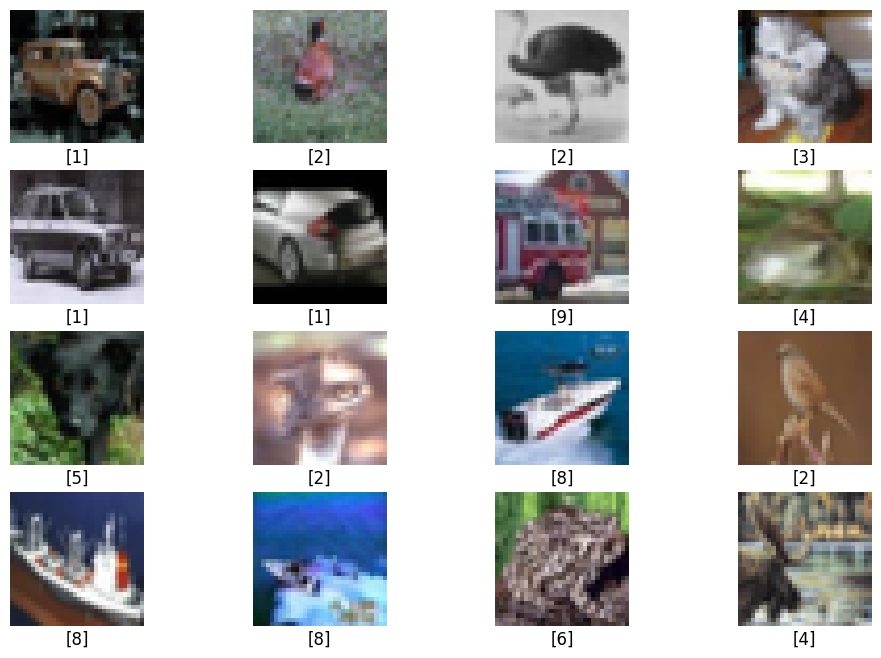

(50000, 1)
Labeling accuracy at start: 60.0


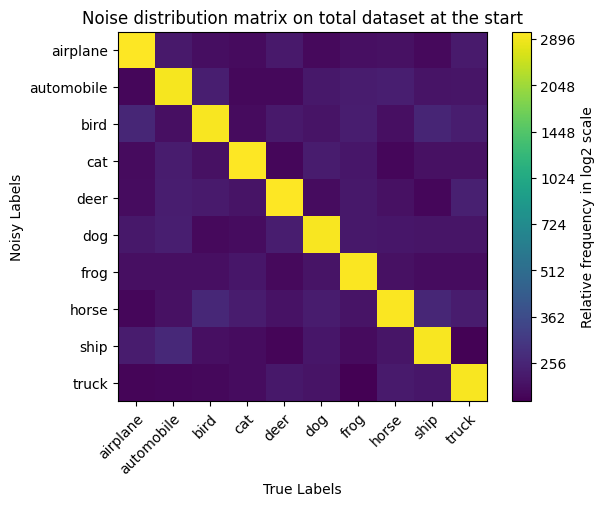

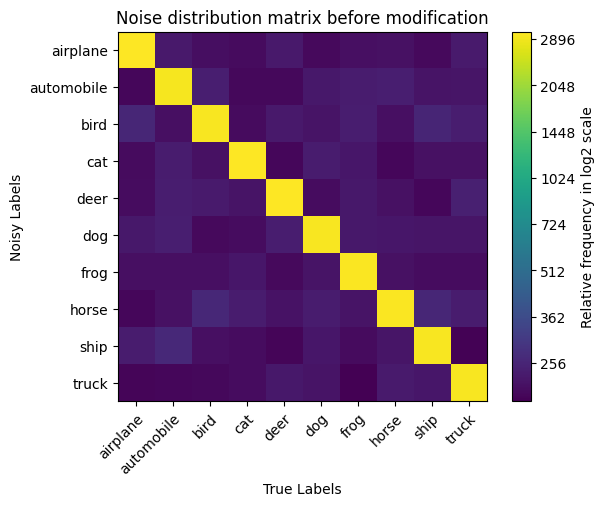


Epoch: 0
 [================================================================>]  Step: 607ms | Tot: 1m23s | Loss: 0.498 | Acc: 22.388% (11194/50000) 782/782 
 [================================================================>]  Step: 16ms | Tot: 7s44ms | Loss: 0.246 | Acc: 41.800% (4180/10000) 157/157 

Epoch: 1
 [================================================================>]  Step: 52ms | Tot: 1m22s | Loss: 0.417 | Acc: 29.292% (14646/50000) 782/782 
 [================================================================>]  Step: 22ms | Tot: 6s987ms | Loss: 0.141 | Acc: 49.570% (4957/10000) 157/157 

Epoch: 2
 [================================================================>]  Step: 51ms | Tot: 1m22s | Loss: 0.370 | Acc: 33.276% (16638/50000) 782/782 
 [================================================================>]  Step: 22ms | Tot: 7s435ms | Loss: 0.109 | Acc: 51.670% (5167/10000) 157/157 

Epoch: 3
 [================================================================>]  Step: 48ms 

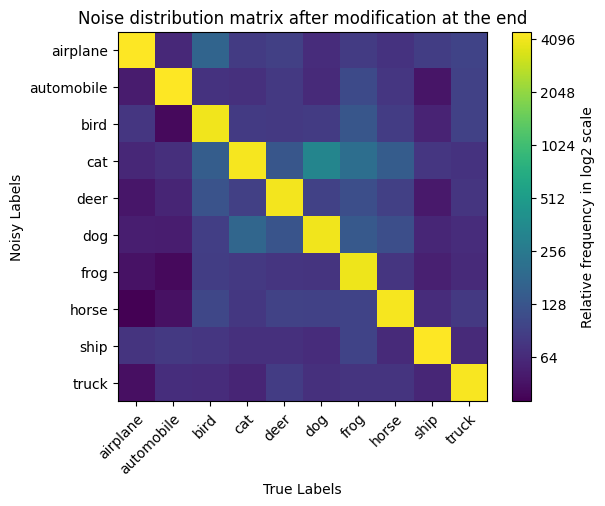

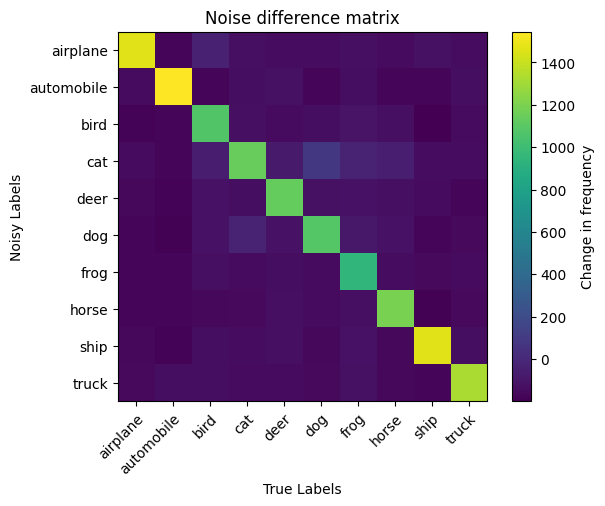

| Elapsed: 1:26:17 | Epoch 1 |  First half epoch | Model training progress: ..................................................  0/50 | Validation accuracy: 88.11% | Validation loss: 1.580 | Dataset modification progress: ==================== 50000/50000 | Dataset half accuracy before half epoch: 60.00% | Dataset half accuracy after half epoch: 84.77% | Correct relabelling: 26.08% | Incorrect relabelling:  1.31% | Neutral relabelling:  1.32% | Total dataset accuracy: 84.77% |


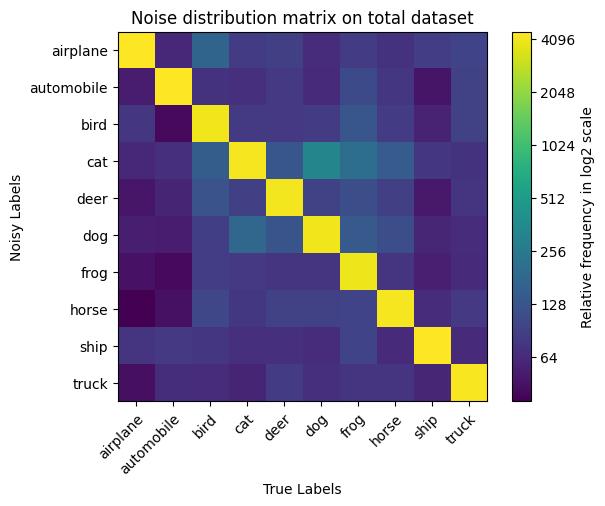

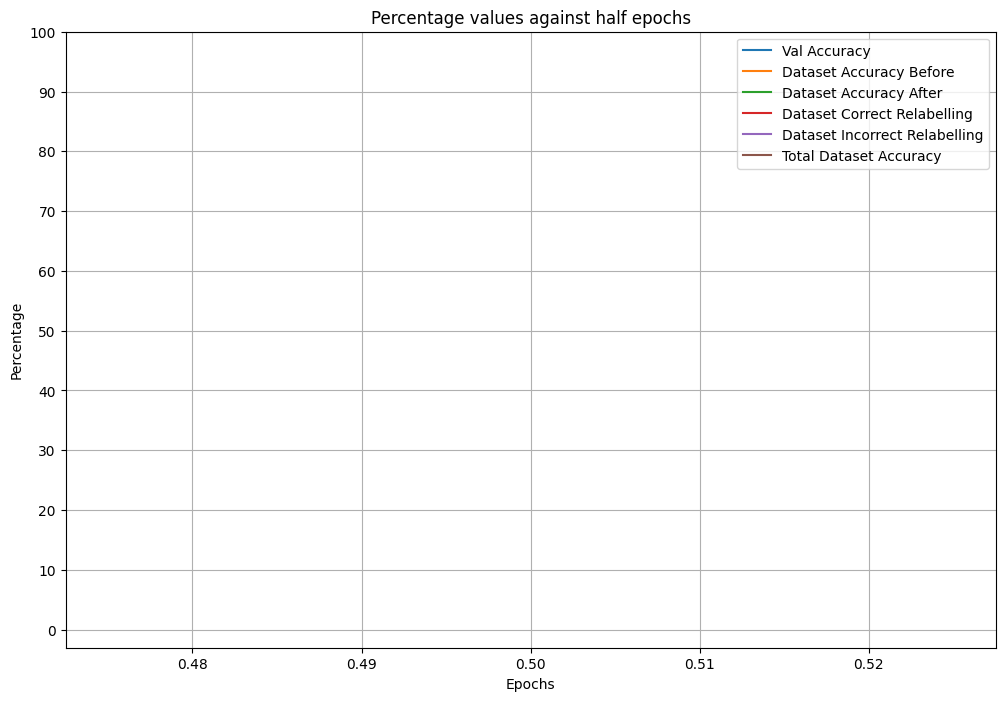

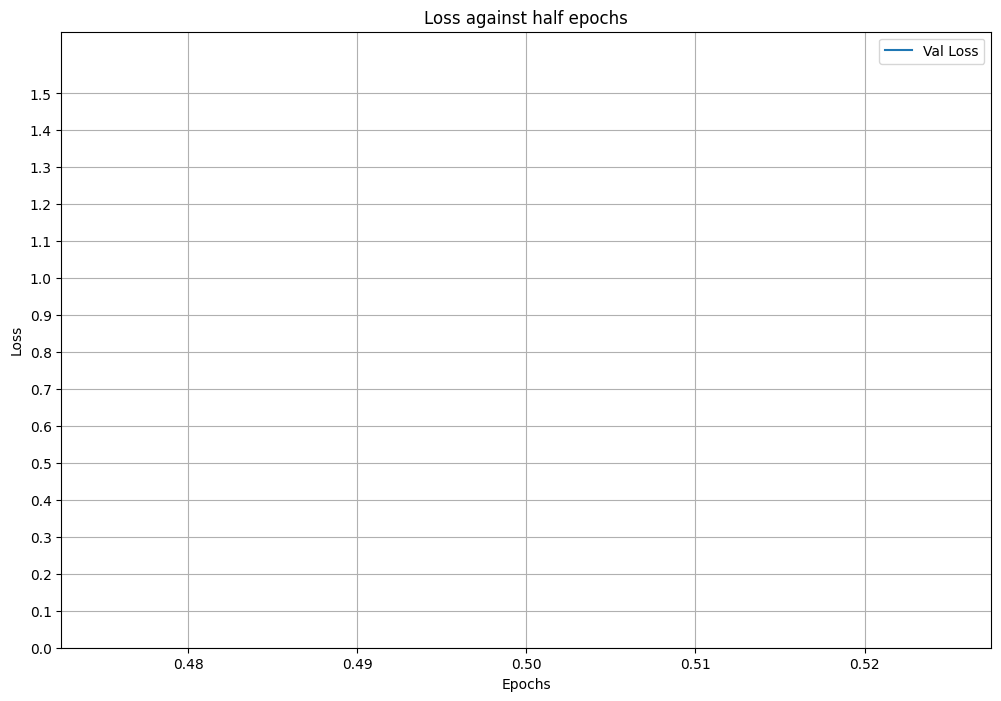


Epoch: 0
 [================================================================>]  Step: 54ms | Tot: 1m22s | Loss: 0.358 | Acc: 33.092% (16546/50000) 782/782 
 [================================================================>]  Step: 31ms | Tot: 7s378ms | Loss: 0.248 | Acc: 41.430% (4143/10000) 157/157 

Epoch: 1
 [================================================================>]  Step: 53ms | Tot: 1m22s | Loss: 0.208 | Acc: 44.520% (22260/50000) 782/782 
 [================================================================>]  Step: 27ms | Tot: 7s60ms | Loss: 0.172 | Acc: 47.340% (4734/10000) 157/157 

Epoch: 2
 [================================================================>]  Step: 49ms | Tot: 1m22s | Loss: 0.100 | Acc: 52.824% (26412/50000) 782/782 
 [================================================================>]  Step: 20ms | Tot: 6s996ms | Loss: 0.040 | Acc: 56.990% (5699/10000) 157/157 

Epoch: 3
 [================================================================>]  Step: 39ms |

In [ ]:
from Rouse import *
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


print("found", len(x_train), "images!")
showSample(x_test, y_test, 16)
y_train, y_train_old = swapLabels(y_train, 0.4)

print("Labeling accuracy at start:", getLabelingAccuracy(y_train, y_train_old))
#showSample(changes, 16)

#accuracyBefore = getValAccuracy(x_train, y_train, x_test, y_test, q = 0.7)
#print(f"Validation accuracy before dataset modification: {accuracyBefore[0]}% with a loss of {accuracyBefore[1]}")
model, (x_train, y_train, y_train_old), metadata = trainEpochs((x_train, y_train, y_train_old), (x_test, y_test), 1, verbose = 1, augmentationForModification=10, subEpochs = 50, subQValue = 0.7, monoepoch = True)
displayGraph(metadata)
accuracyAfter = getValAccuracy(x_train, y_train, x_test, y_test, q = 0.7)
print(f"Validation accuracy after dataset modification: {accuracyAfter[0]}% with a loss of {accuracyAfter[1]}")

#accuracyBefore = getValAccuracy(x_train, y_train, x_test, y_test)
#print(f"Validation accuracy before dataset modification: {accuracyBefore[0]}% with a loss of {accuracyBefore[1]}")
#model1, (x_train, y_train, y_train_old), metadata1 = trainEpochs((x_train, y_train, y_train_old), (x_test, y_test), MAIN_EPOCHS, verbose = 1, mode="delete")
#accuracyAfter = getValAccuracy(x_train, y_train, x_test, y_test)
#print(f"Validation accuracy after dataset modification: {accuracyAfter[0]}% with a loss of {accuracyAfter[1]}")

#displayGraph(metadata1)

170498071/170498071 [==============================] - 13s 0us/step
found 50000 images!


/usr/local/lib/python3.9/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


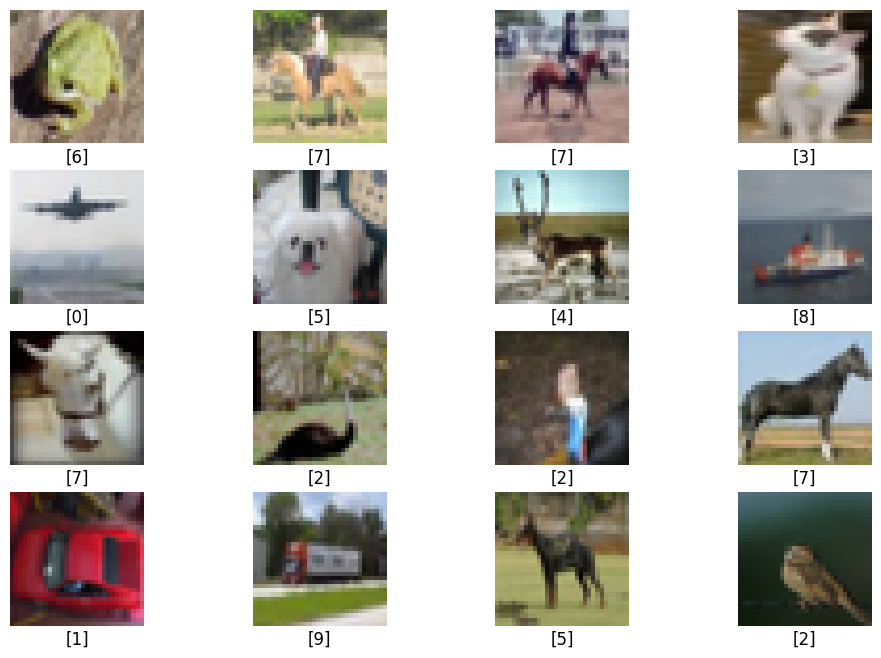

(50000, 1)
Labeling accuracy at start: 60.0

Epoch: 0
 [================================================================>]  Step: 278ms | Tot: 26s274ms | Loss: 0.504 | Acc: 22.132% (11066/50000) 782/782 
 [================================================================>]  Step: 21ms | Tot: 3s122ms | Loss: 0.237 | Acc: 41.770% (4177/10000) 157/157 

Epoch: 1
 [================================================================>]  Step: 35ms | Tot: 26s479ms | Loss: 0.421 | Acc: 29.158% (14579/50000) 782/782 
 [================================================================>]  Step: 16ms | Tot: 3s73ms | Loss: 0.197 | Acc: 44.820% (4482/10000) 157/157 

Epoch: 2
 [================================================================>]  Step: 29ms | Tot: 26s167ms | Loss: 0.376 | Acc: 32.762% (16381/50000) 782/782 
 [================================================================>]  Step: 17ms | Tot: 2s988ms | Loss: 0.093 | Acc: 53.310% (5331/10000) 157/157 

Epoch: 3
 [==========================

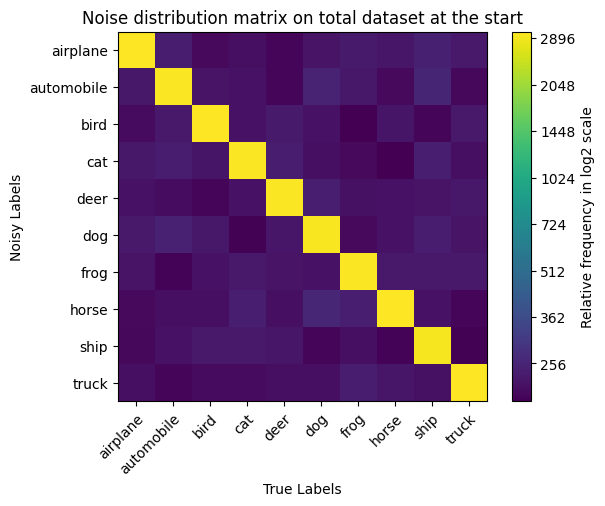

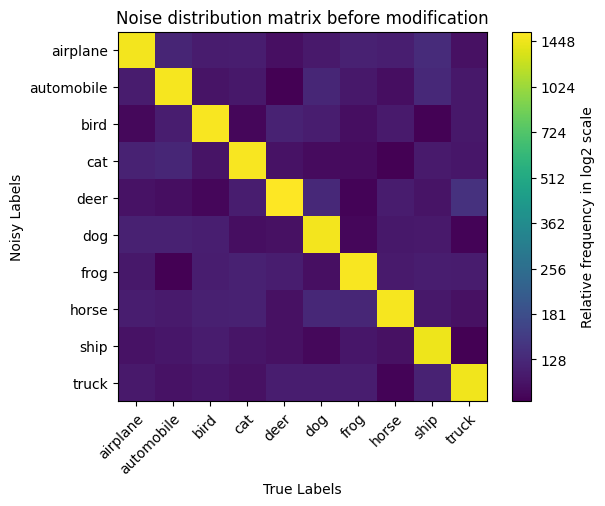


Epoch: 0
 [================================================================>]  Step: 292ms | Tot: 13s458ms | Loss: 0.535 | Acc: 19.348% (4837/25000) 391/391 
 [================================================================>]  Step: 17ms | Tot: 3s186ms | Loss: 0.326 | Acc: 35.190% (3519/10000) 157/157 

Epoch: 1
 [================================================================>]  Step: 32ms | Tot: 13s218ms | Loss: 0.466 | Acc: 25.412% (6353/25000) 391/391 
 [================================================================>]  Step: 16ms | Tot: 3s47ms | Loss: 0.280 | Acc: 38.290% (3829/10000) 157/157 

Epoch: 2
 [================================================================>]  Step: 31ms | Tot: 13s22ms | Loss: 0.434 | Acc: 28.172% (7043/25000) 391/391 
 [================================================================>]  Step: 22ms | Tot: 3s158ms | Loss: 0.195 | Acc: 45.430% (4543/10000) 157/157 

Epoch: 3
 [================================================================>]  Step: 

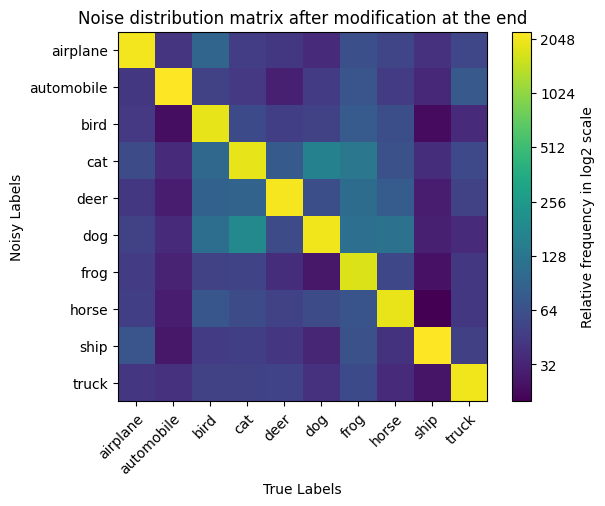

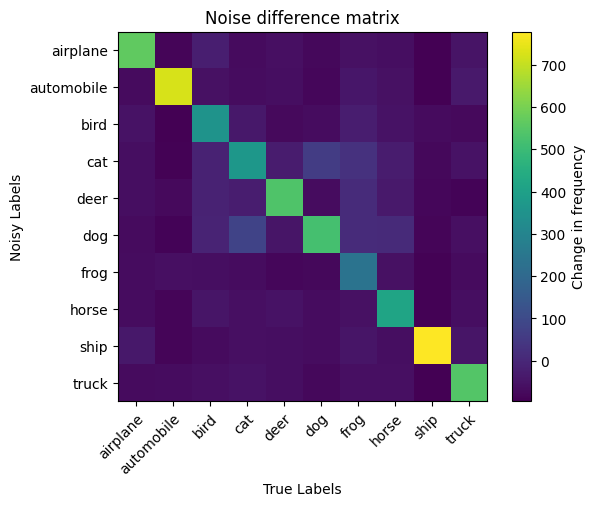

| Elapsed: 0:19:21 | Epoch 1 |  First half epoch | Model training progress: ..................................................  0/50 | Validation accuracy: 83.40% | Validation loss: 1.628 | Dataset modification progress: ==================== 25000/25000 | Dataset half accuracy before half epoch: 59.92% | Dataset half accuracy after half epoch: 80.07% | Correct relabelling: 23.12% | Incorrect relabelling:  2.97% | Neutral relabelling:  1.83% | Total dataset accuracy: 70.08% |


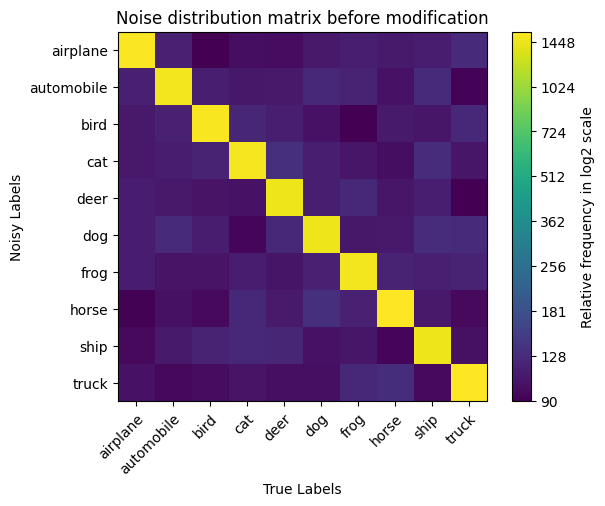


Epoch: 0
 [================================================================>]  Step: 31ms | Tot: 13s121ms | Loss: 0.537 | Acc: 19.004% (4751/25000) 391/391 
 [================================================================>]  Step: 18ms | Tot: 3s153ms | Loss: 0.403 | Acc: 29.970% (2997/10000) 157/157 

Epoch: 1
 [================================================================>]  Step: 26ms | Tot: 13s399ms | Loss: 0.473 | Acc: 24.892% (6223/25000) 391/391 
 [================================================================>]  Step: 20ms | Tot: 3s11ms | Loss: 0.255 | Acc: 40.300% (4030/10000) 157/157 

Epoch: 2
 [================================================================>]  Step: 36ms | Tot: 13s249ms | Loss: 0.437 | Acc: 27.852% (6963/25000) 391/391 
 [================================================================>]  Step: 21ms | Tot: 3s120ms | Loss: 0.180 | Acc: 46.780% (4678/10000) 157/157 

Epoch: 3
 [================================================================>]  Step: 

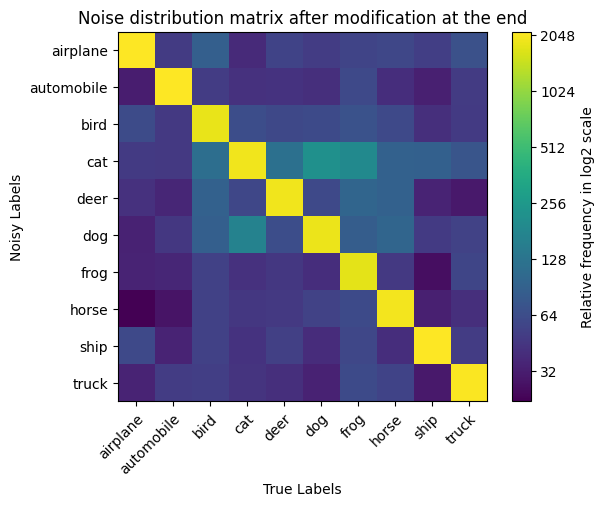

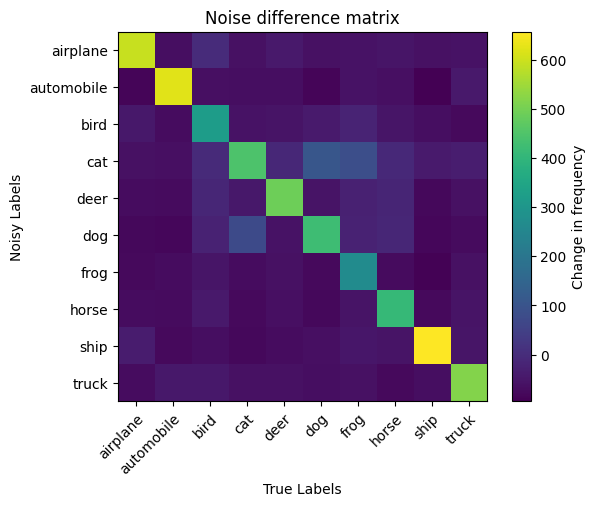

| Elapsed: 0:19:26 | Epoch 1 | Second half epoch | Model training progress: ..................................................  0/50 | Validation accuracy: 82.72% | Validation loss: 1.634 | Dataset modification progress: ==================== 25000/25000 | Dataset half accuracy before half epoch: 60.08% | Dataset half accuracy after half epoch: 79.06% | Correct relabelling: 22.44% | Incorrect relabelling:  3.46% | Neutral relabelling:  2.11% | Total dataset accuracy: 79.57% |


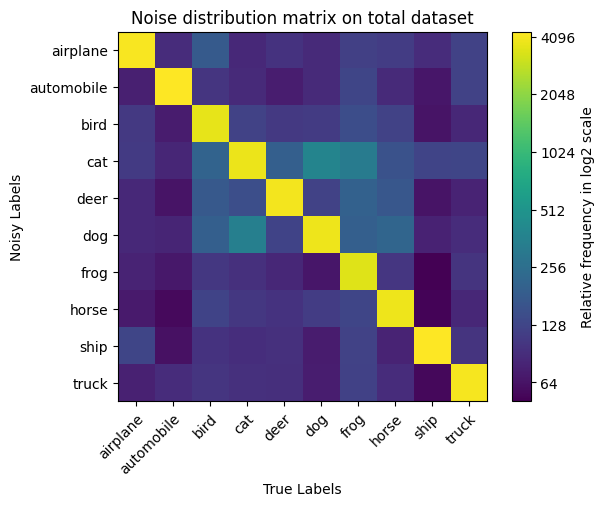

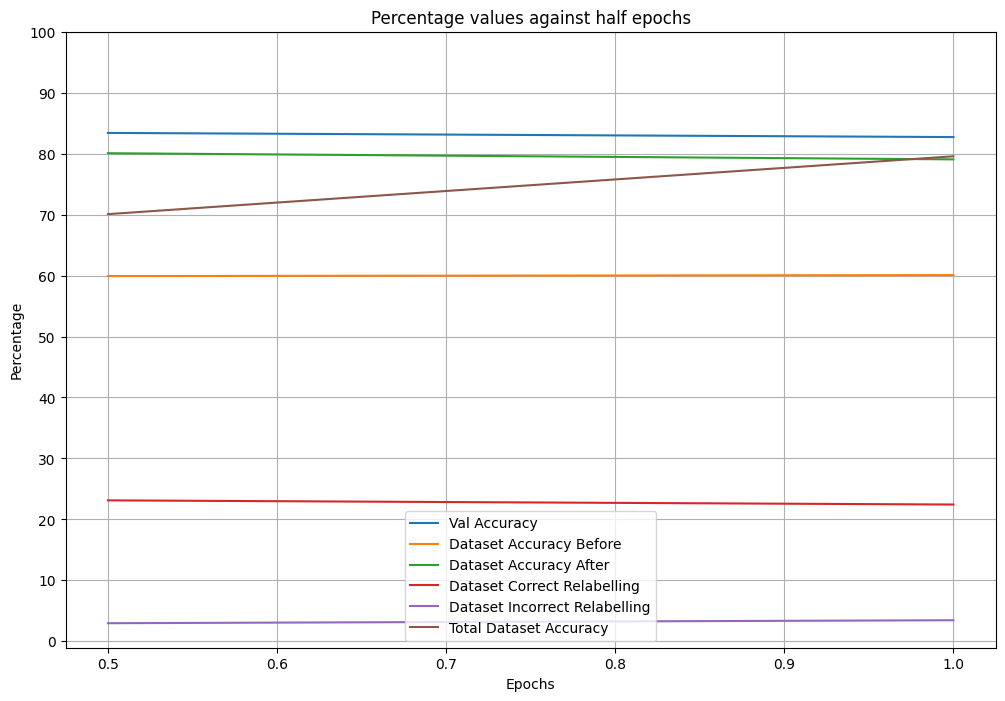

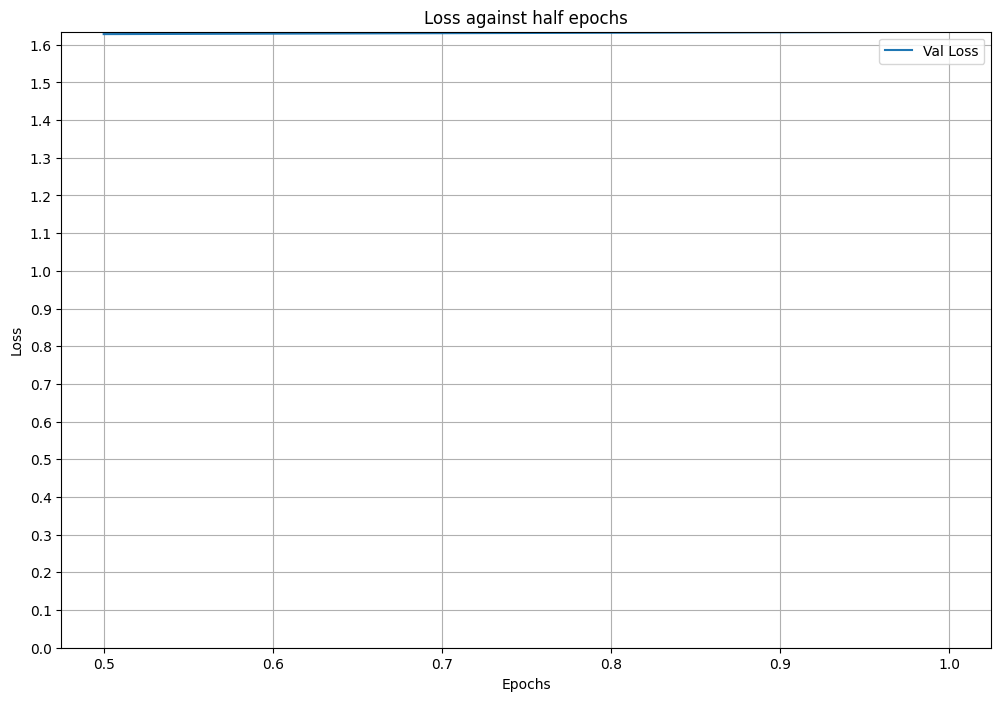


Epoch: 0
 [================================================================>]  Step: 30ms | Tot: 26s558ms | Loss: 0.368 | Acc: 32.482% (16241/50000) 782/782 
 [================================================================>]  Step: 22ms | Tot: 3s222ms | Loss: 0.229 | Acc: 42.980% (4298/10000) 157/157 

Epoch: 1
 [================================================================>]  Step: 24ms | Tot: 26s355ms | Loss: 0.206 | Acc: 44.808% (22404/50000) 782/782 
 [================================================================>]  Step: 12ms | Tot: 3s140ms | Loss: 0.144 | Acc: 49.620% (4962/10000) 157/157 

Epoch: 2
 [================================================================>]  Step: 27ms | Tot: 26s706ms | Loss: 0.097 | Acc: 52.996% (26498/50000) 782/782 
 [================================================================>]  Step: 12ms | Tot: 3s57ms | Loss: 0.056 | Acc: 56.150% (5615/10000) 157/157 

Epoch: 3
 [================================================================>]  Ste

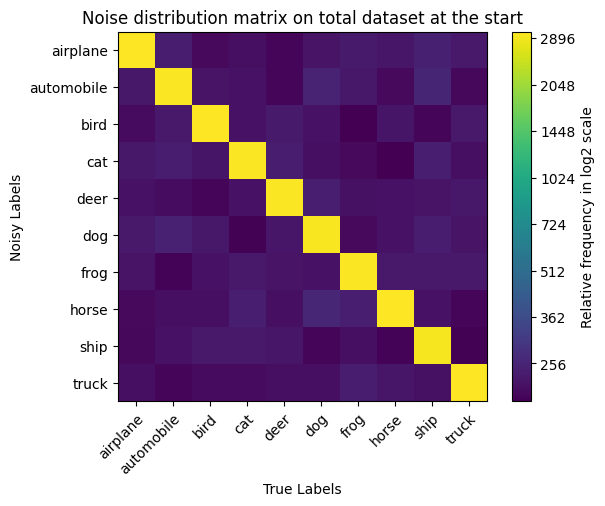

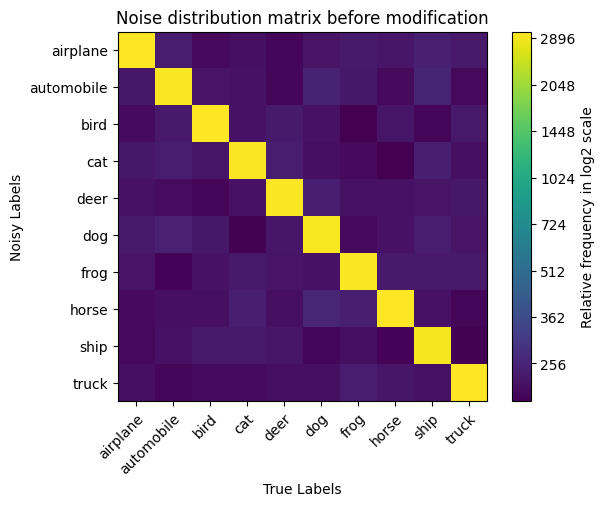


Epoch: 0
 [================================================================>]  Step: 30ms | Tot: 25s430ms | Loss: 0.498 | Acc: 22.628% (11314/50000) 782/782 
 [================================================================>]  Step: 16ms | Tot: 3s28ms | Loss: 0.241 | Acc: 41.530% (4153/10000) 157/157 

Epoch: 1
 [================================================================>]  Step: 29ms | Tot: 25s677ms | Loss: 0.425 | Acc: 28.796% (14398/50000) 782/782 
 [================================================================>]  Step: 18ms | Tot: 3s134ms | Loss: 0.177 | Acc: 46.270% (4627/10000) 157/157 

Epoch: 2
 [================================================================>]  Step: 26ms | Tot: 25s545ms | Loss: 0.377 | Acc: 32.830% (16415/50000) 782/782 
 [================================================================>]  Step: 34ms | Tot: 3s99ms | Loss: 0.081 | Acc: 53.790% (5379/10000) 157/157 

Epoch: 3
 [================================================================>]  Step

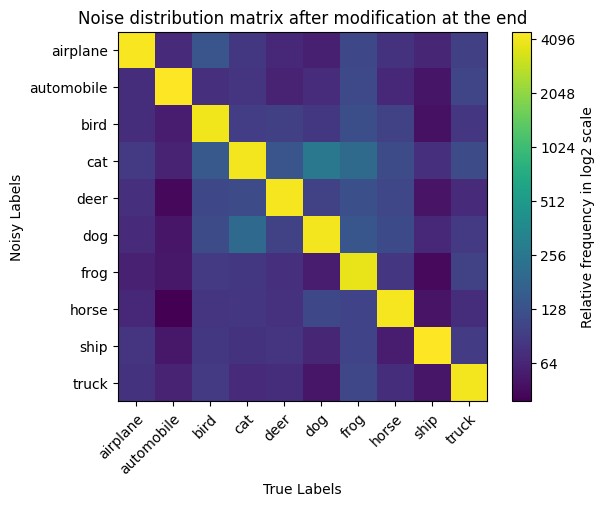

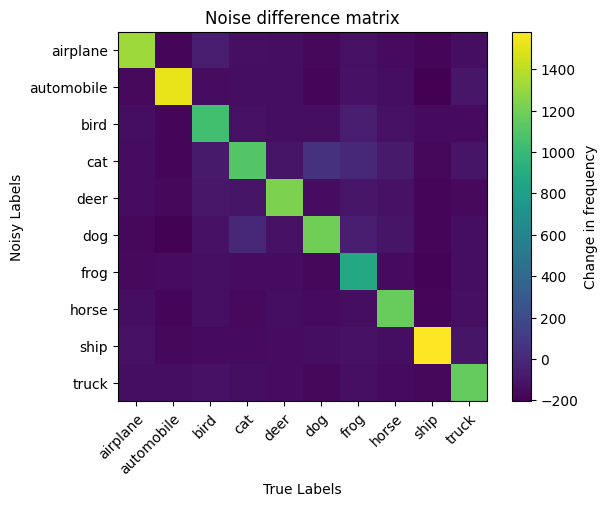

| Elapsed: 0:34:49 | Epoch 1 |  First half epoch | Model training progress: ..................................................  0/50 | Validation accuracy: 87.84% | Validation loss: 1.583 | Dataset modification progress: ==================== 50000/50000 | Dataset half accuracy before half epoch: 60.00% | Dataset half accuracy after half epoch: 84.37% | Correct relabelling: 25.59% | Incorrect relabelling:  1.22% | Neutral relabelling:  1.34% | Total dataset accuracy: 84.37% |


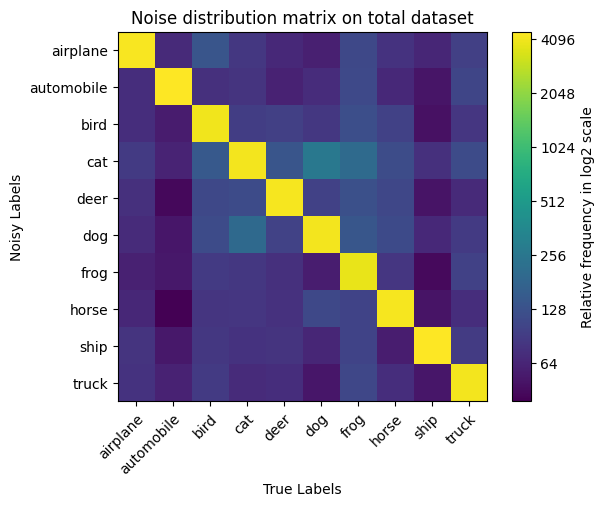

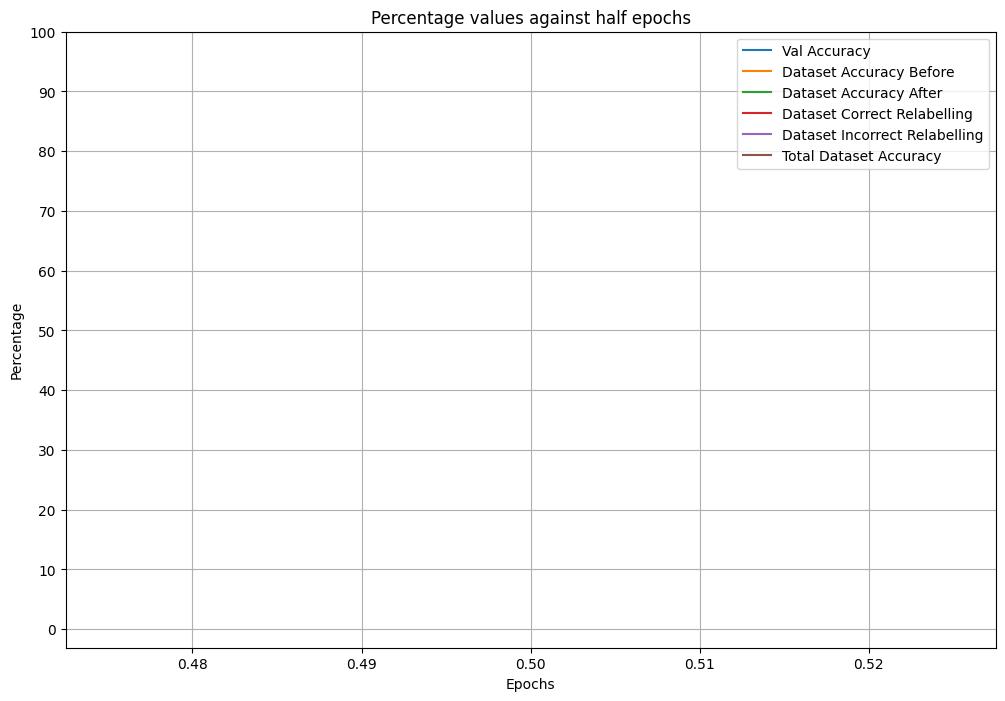

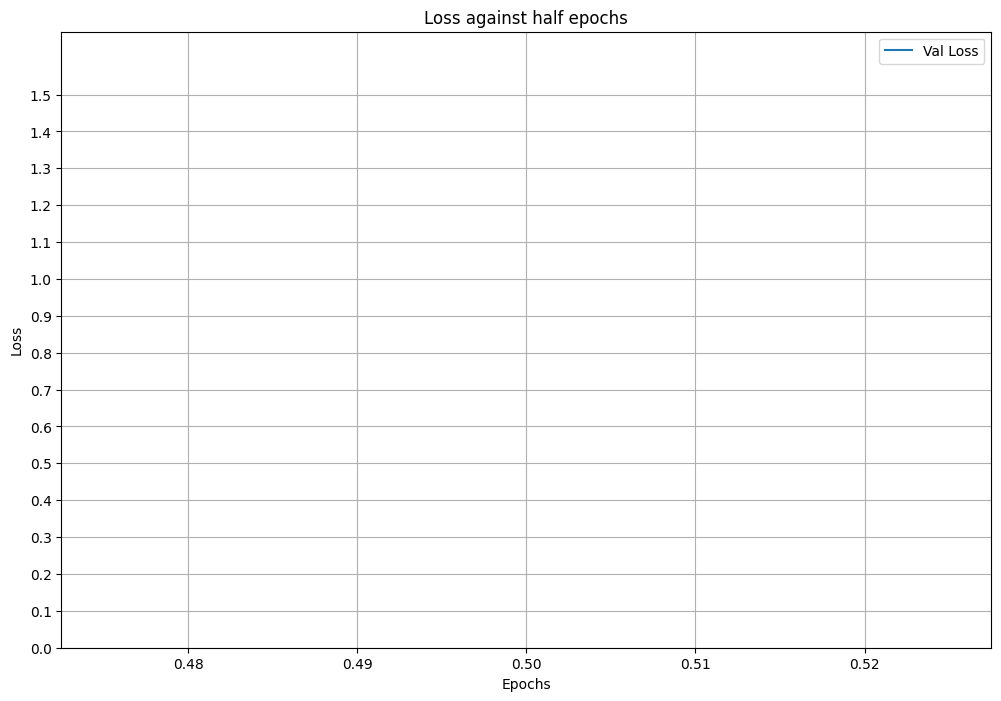


Epoch: 0
 [================================================================>]  Step: 32ms | Tot: 25s528ms | Loss: 0.347 | Acc: 34.072% (17036/50000) 782/782 
 [================================================================>]  Step: 19ms | Tot: 3s122ms | Loss: 0.228 | Acc: 42.970% (4297/10000) 157/157 

Epoch: 1
 [================================================================>]  Step: 38ms | Tot: 25s803ms | Loss: 0.172 | Acc: 47.466% (23733/50000) 782/782 
 [================================================================>]  Step: 18ms | Tot: 2s966ms | Loss: 0.168 | Acc: 48.290% (4829/10000) 157/157 

Epoch: 2
 [================================================================>]  Step: 37ms | Tot: 25s949ms | Loss: 0.070 | Acc: 54.994% (27497/50000) 782/782 
 [================================================================>]  Step: 20ms | Tot: 3s70ms | Loss: 0.010 | Acc: 59.350% (5935/10000) 157/157 

Epoch: 3
 [================================================================>]  Ste

In [ ]:
from Rouse import *
from tensorflow.keras.datasets import cifar10
import copy

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


print("found", len(x_train), "images!")
showSample(x_test, y_test, 16)
y_train, y_train_old = swapLabels(y_train, 0.4)
xtraincopy = copy.deepcopy(x_train)
ytraincopy = copy.deepcopy(y_train)
ytrainoldcopy = copy.deepcopy(y_train_old)

print("Labeling accuracy at start:", getLabelingAccuracy(y_train, y_train_old))
#showSample(changes, 16)

accuracyBefore = getValAccuracy(x_train, y_train, x_test, y_test, q = 0.7)
print(f"Validation accuracy before dataset modification: {accuracyBefore[0]}% with a loss of {accuracyBefore[1]}")
model, (x_train, y_train, y_train_old), metadata = trainEpochs((x_train, y_train, y_train_old), (x_test, y_test), 1, verbose = 1, augmentationForModification=10, subEpochs = 50, subQValue = 0.7, monoepoch = False)
displayGraph(metadata)
accuracyAfter = getValAccuracy(x_train, y_train, x_test, y_test, q = 0.7)
print(f"Validation accuracy after dataset modification: {accuracyAfter[0]}% with a loss of {accuracyAfter[1]}")

model, (x_train, y_train, y_train_old), metadata = trainEpochs((xtraincopy, ytraincopy, ytrainoldcopy), (x_test, y_test), 1, verbose = 1, augmentationForModification=10, subEpochs = 50, subQValue = 0.7, monoepoch = True)
displayGraph(metadata)
accuracyAfter = getValAccuracy(x_train, y_train, x_test, y_test, q = 0.7)
print(f"Validation accuracy after dataset modification: {accuracyAfter[0]}% with a loss of {accuracyAfter[1]}")

#accuracyBefore = getValAccuracy(x_train, y_train, x_test, y_test)
#print(f"Validation accuracy before dataset modification: {accuracyBefore[0]}% with a loss of {accuracyBefore[1]}")
#model1, (x_train, y_train, y_train_old), metadata1 = trainEpochs((x_train, y_train, y_train_old), (x_test, y_test), MAIN_EPOCHS, verbose = 1, mode="delete")
#accuracyAfter = getValAccuracy(x_train, y_train, x_test, y_test)
#print(f"Validation accuracy after dataset modification: {accuracyAfter[0]}% with a loss of {accuracyAfter[1]}")

#displayGraph(metadata1)

In [ ]:
print(metadata)
print(len(images))
correct, incorrect = getCorrectSample(images)
print(len(correct))
print(len(incorrect))
showSample(correct, 16)
showSample(incorrect, 16)

{'val accuracy': [88.10999989509583], 'val loss': [1.5800772905349731], 'dataset accuracy before': [60.0], 'dataset accuracy after': [84.76599999999999], 'dataset correct relabelling': [26.076], 'dataset incorrect relabelling': [1.31], 'dataset neutral relabelling': [1.32], 'total dataset accuracy': [84.76599999999999]}


NameError: ignored

In [ ]:
#metadata = {'val accuracy': [91.36666655540466, 93.7166690826416, 94.23333406448364, 94.81666684150696, 95.45000195503235, 96.31666541099548, 96.78333401679993, 96.14999890327454], 'val loss': [0.9319291114807129, 0.5999569892883301, 0.36166685819625854, 0.21822355687618256, 0.17234396934509277, 0.12887966632843018, 0.11454400420188904, 0.13207554817199707], 'dataset accuracy before': [50.59259259259259, 49.407407407407405, 66.4074074074074, 66.77407407407408, 91.40370370370371, 91.35185185185185, 95.64444444444445, 96.08148148148148], 'dataset accuracy after': [57.733333333333334, 75.44814814814815, 89.22592592592594, 93.52962962962962, 95.25925925925925, 96.46666666666667, 96.57777777777777, 96.87037037037037], 'dataset correct relabelling': [7.151851851851852, 26.185185185185183, 23.18148148148148, 27.48888888888889, 4.588888888888889, 5.774074074074074, 1.5962962962962963, 1.6481481481481481], 'dataset incorrect relabelling': [0.011111111111111112, 0.14444444444444443, 0.362962962962963, 0.7333333333333333, 0.7333333333333333, 0.6592592592592592, 0.662962962962963, 0.8592592592592593], 'total dataset accuracy': [53.57037037037037, 66.59074074074074, 78.0, 91.37777777777778, 93.30555555555556, 95.86296296296297, 96.32962962962964, 96.72407407407407]} # Remove me

In [ ]:
displayGraph(metadata)

In [ ]:
print(labels)

In [ ]:
images = getImages()
images = random.sample(images, 10000)
print("found", len(images), "images!")
images, val_images = splitTrainVal(images, 0.1)
#showSample(images, 16)
#showSample(val_images, 16)
images, changes = swapLabels(images, 0.5)
print("Labeling accuracy at start:", getLabelingAccuracy(images))
#showSample(changes, 16)

model, images1, metadata = trainEpochs(copy.deepcopy(images), MAIN_EPOCHS, verbose = 1)

displayGraph(metadata)

model1, images1, metadata1 = trainEpochs(copy.deepcopy(images), MAIN_EPOCHS, verbose = 1, mode="delete")

displayGraph(metadata1)
print(metadatalist)

In [ ]:
for metadata in metadatalist:
  displayGraph(metadata)